<a href="https://colab.research.google.com/github/mahesh-kc/AI-Q3-learning-resources/blob/master/ch5_cats%26dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip "drive/My Drive/dogs-vs-cats.zip"
!unzip train.zip
!mkdir source_data
!mv train source_data
#!ls source_data/train

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      

In [0]:
import os, shutil
def createIfNot(pathName):
    if os.path.exists(pathName):
        print(pathName, " Already Exists")
    else:
        os.mkdir(pathName)

original_dataset_dir = 'source_data/train'

modelStoragePath = "drive/My Drive/"

base_dir = 'cats_and_dogs_small'
createIfNot(base_dir)
train_dir = os.path.join(base_dir, 'train')
createIfNot(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
createIfNot(validation_dir)
test_dir = os.path.join(base_dir, 'test')
createIfNot(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
createIfNot(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
createIfNot(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
createIfNot(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
createIfNot(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
createIfNot(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
createIfNot(test_dogs_dir)

In [0]:
#cats pictures for training
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#getting 500 cats pictures for validation
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

#getting 500 pictures for Test
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
#getting 1000 dogs pics for traing
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#getting 500 dogs pics for validation
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

##getting 500 dogs pics for testing
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [0]:
from tensorflow.keras import datasets, layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # Target Directory
    target_size=(150, 150), # Resizes all images to 150 × 150
    batch_size=20,
    class_mode='binary') # Because you use binary_crossentropy loss, you need binary labels.

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, label_batch in train_generator:
  print('data batch shape: ', data_batch.shape)
  print('label batch shape: ', label_batch.shape)
  break

data batch shape:  (20, 150, 150, 3)
label batch shape:  (20,)


In [0]:
import pickle
def saveData(model, history, iteration):
    modelFile = modelStoragePath + "model_cats_dogs_small" + str(iteration).strip() + ".h5"
    historyFile = modelStoragePath + "History_cats_and_dogs_small" + str(iteration).strip() + ".pkle"
    model.save(modelFile)
    #saving history file too
    with open(historyFile, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
    return modelFile, historyFile

import tensorflow.keras.models
def loadData(iteration):
    modelFile = modelStoragePath + "model_cats_dogs_small" + str(iteration).strip() + ".h5"
    historyFile = modelStoragePath + "History_cats_and_dogs_small" + str(iteration).strip() + ".pkle"
    model = models.load_model(modelFile)
    with open(historyFile, 'rb') as file_pi:
        history = pickle.load(file_pi)
    return model, history

In [13]:
# Listing 5.8 Fitting the model using a batch generator
# Please use Model.fit, which supports generators.
# .fit method (which now supports data augmentation). tensorflow==2.2.0 or higher
history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

modelFile, HistoryFile = saveData(model, history, iteration=1)
print(modelFile, HistoryFile, "Saved")

Epoch 1/30
100/100 [==============================] - 9s 93ms/step - loss: 0.6928 - acc: 0.5340 - val_loss: 0.6787 - val_acc: 0.6170
Epoch 2/30
100/100 [==============================] - 9s 91ms/step - loss: 0.6649 - acc: 0.6035 - val_loss: 0.6454 - val_acc: 0.6380
Epoch 3/30
100/100 [==============================] - 9s 90ms/step - loss: 0.6249 - acc: 0.6535 - val_loss: 0.6206 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 9s 89ms/step - loss: 0.5794 - acc: 0.7000 - val_loss: 0.6017 - val_acc: 0.6600
Epoch 5/30
100/100 [==============================] - 9s 90ms/step - loss: 0.5454 - acc: 0.7260 - val_loss: 0.6138 - val_acc: 0.6630
Epoch 6/30
100/100 [==============================] - 9s 91ms/step - loss: 0.5084 - acc: 0.7555 - val_loss: 0.5761 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 9s 88ms/step - loss: 0.4858 - acc: 0.7690 - val_loss: 0.6385 - val_acc: 0.6560
Epoch 8/30
100/100 [==============================] - 9s 86ms/step - 

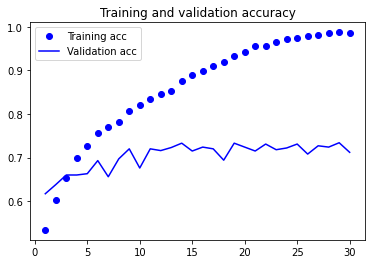

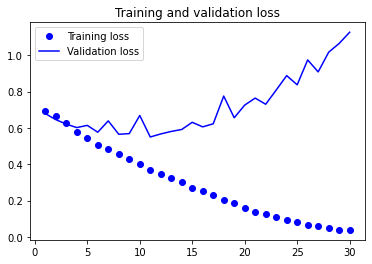

In [14]:

#model, history = loadData(iteration = 1)

#Listing 5.10 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
%matplotlib inline  

history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
#Listing 5.11 Setting up a data augmentation configuration via ImageDataGenerator
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [0]:
#Listing 5.13 Defining a new convnet that includes dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [18]:
#Listing 5.14 Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 17s 169ms/step - loss: 0.6926 - acc: 0.5130 - val_loss: 0.6881 - val_acc: 0.5470
Epoch 2/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6850 - acc: 0.5585 - val_loss: 0.6640 - val_acc: 0.5970
Epoch 3/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6758 - acc: 0.5605 - val_loss: 0.6857 - val_acc: 0.5480
Epoch 4/100
100/100 [==============================] - 17s 170ms/step - loss: 0.6627 - acc: 0.5860 - val_loss: 0.8648 - val_acc: 0.5020
Epoch 5/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6508 - acc: 0.6110 - val_loss: 0.6392 - val_acc: 0.6150
Epoch 6/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6421 - acc: 0.6265 - val_loss: 0.6115 - val_acc: 0.6550
Epoch 7/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6367 - acc: 0.6385 - val_loss: 0.6102 - val_acc: 0.6530
Epoch 8/100
100/100 [===========================

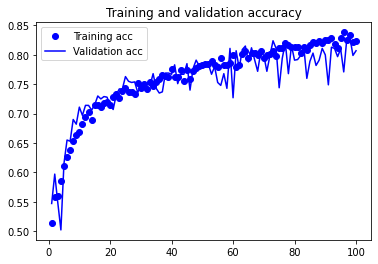

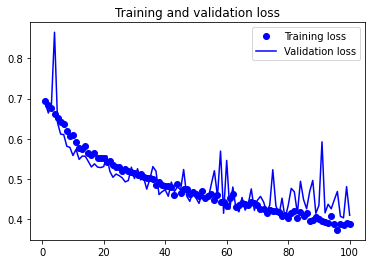

In [20]:

#model, history = loadData(iteration = 1)

#Listing 5.10 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
%matplotlib inline  

history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()